<a href="https://colab.research.google.com/github/stefanoscolapasta/Philosophy/blob/main/hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**a)** After a bit of reasoning I feel like I would be willing to pay around 50 SEK to enter such game. This because I would have a $\frac{1}{16}$ probability, so a *6.25%* to win more than the bet. Also, 50 SEK does not feel like a great amount of money, so I would be willing to put such amount on the stake. Anything above 100 SEK feels way too much for me.

**b)** An unrealistic assumption is that the casino has an infinite amount of money, which clearly is not true. So the expected value cannot be infinite.
Another unrealistic assumptions could be that the player will not become bored of the game after a certain amount of time. Additionally, it is assumed that the player will be able to continue playing the game indefinitely, which may not be realistic in the long run.

**c)** As suggested by the problem description, I chose a maximum payout of 10 million SEK. At each game the initial payoff value is set to 10 SEK

In [ ]:
import statistics, numpy

def petersburg_finite(casinoLimit):
  payoff = 10
  while numpy.random.uniform() > 0.5:
    payoff *= 2
    if payoff > casinoLimit:
      return casinoLimit
  return payoff

def simulation(casinoLimit, numberOfGames):
    payoffs = numpy.zeros(numberOfGames)
    for i in range(numberOfGames):
      payoffs[i] = petersburg_finite(casinoLimit)
    means = numpy.zeros(numberOfGames)
    #Here calculating average payoff calculated over the last i games as a function of i
    for i in range(len(payoffs)):
      means[i] = (float(numpy.sum(payoffs[:i+1]))/(i+1))
    return means, payoffs

We will now launch the simulation with a limit of 10 million SEK and attempt to play 100'000 games (Trying with 1'000'000 games results in an extremelly long time to compute the result). With 100'000 games it takes around 3/4 seconds to compute the whole simulation.

In [ ]:
casinoPayoutLimit = 10_000_000
totalNumberOfGames = 100_000
averages, games = simulation(casinoPayoutLimit,totalNumberOfGames)

If we then decide to plot such data

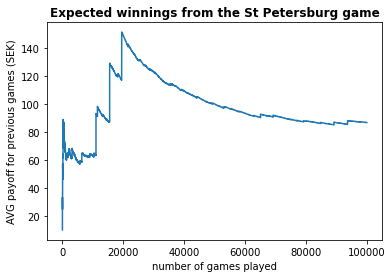

In [ ]:
import matplotlib.pyplot as plt
plt.plot(averages)
plt.title("Expected winnings from the St Petersburg game", weight="bold")
plt.xlabel("number of games played")
plt.ylabel("AVG payoff for previous games (SEK)")
plt.show();

Here instead we plot the payoff from each game played. Plotly might express the result on the y-axis in terms of 1 * 10^6

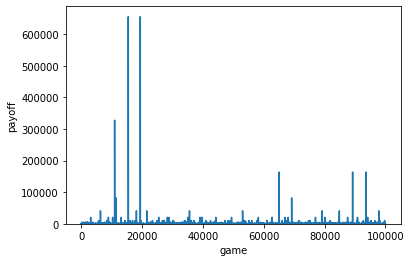

In [ ]:
plt.plot(games)
plt.hist(numpy.log(games), alpha=0.9, density=True)
plt.xlabel("game")
plt.ylabel("payoff")
plt.show();

The following code shows some more insights about the simulation.

In [ ]:
avereagePayoff = games.mean()
bestPayoff = games.max()
sekToEurConv = 0.092
print("Average payoff out of all games: " + str(avereagePayoff) + " SEK -> " + str(int(avereagePayoff*sekToEurConv)) + " €")
print("Best payoff ever won out of all games: " + str(bestPayoff) + " SEK -> " + str(int(bestPayoff*sekToEurConv)) + " €")


Average payoff out of all games: 86.7873 SEK -> 7 €
Best payoff ever won out of all games: 655360.0 SEK -> 60293 €
